In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Немного теоретических основ

## Немного о смысле вероятности

В общем случае процесс байесовского моделирования включает три основных этапа. 
<ol>
<li>Выбираются некоторые данные и делаются предварительные предположения о том, как эти данные могли быть сгенерированы (извлечены), затем формируется модель с помощью объединения структурных компонентов, известных под названием распределения вероятностей. В основном эти модели представляют собой достаточно грубые приближения (аппроксимации), но в большинстве случаев это именно то, что нам нужно. </li>
<li>Используется теорема Байеса для добавления данных в сформированные модели, и выполняются логические выводы по совокупности данных и наших предварительных предположений. Обычно это называют формированием или уточнением условий работы модели по имеющимся данным. </li>
<li>Модель критически оценивается посредством проверки степени осмысленности результатов по различным критериям, включая данные, уровень наших экспертных знаний в области исследований, а иногда путем сравнения нескольких моделей </li>
</ol>
Вообще говоря, три перечисленных выше этапа в большинстве случаев выполняются итеративно и без соблюдения строгого порядка. Мы будем возвращаться для повторения любого из этих этапов в произвольные моменты времени: возможно, была совершена ошибка при написании кода, или был найден способ изменить и усовершенствовать модель, или возникла необходимость добавления новых данных или сбора данных другого типа. <br>
Байесовские модели также называют вероятностными моделями, потому что они создаются с использованием вероятностей, поэтому может возникать путаница при общении с коллегами применяющими классические вероятностные методы. <br>
Поскольку наши модели ступает на землю «неопределенности», то вероятности являются самым правильным математическим инструментом для подобного моделирования. <br>
Несмотря на то что теория вероятностей является вполне сформировавшейся и прочно обоснованной математической дисциплиной (вспомним, «сигма алгебра над пространством исходов»), существуют и другие интерпретации смысла термина «вероятность».<br> 
С байесовской точки зрения вероятность – это мера, которая определяет в числовом выражении уровень неопределенности высказывания. <br>
С учетом этого определения вероятности абсолютно допустимо и даже естественно задать вопрос о вероятности существования жизни на Марсе, о вероятности того, что масса электрона составляет $9.1\cdot 10^{–31}$ кг, или о вероятности того, что 22 июня 1812 года в Москве был солнечный день. <br>
Но при этом следует отметить, например, что жизнь на Марсе либо существует, либо не существует, то есть итоговый результат бинарный, это тип вопроса с ответом да-нет. Но, учитывая то, что мы не уверены в самом факте существования жизни на Марсе, разумным образом действий является попытка определить, насколько вероятна жизнь на Марсе.  <br>
Если у нас нет информации о задаче, то вполне разумно утверждать, что любое возможное событие одинаково вероятно (правдоподобно), а с формальной точки зрения это равносильно предположению об одинаковой вероятности наступления любого возможного события. При отсутствии информации неопределенность максимальна. Но если нам известно, что наступление каких-либо событий более правдоподобно, то это можно формально представить предположением о более высокой вероятности наступления этих событий и более низкой вероятности для прочих событий.  <br>
Отметим, что когда мы говорим о событиях в контексте статистики, то не ограничиваемся «событиями, которые могут произойти».  <br>
Событие – это любое из возможных значений (или набора значений), которые может принимать некоторая переменная, например событие, соответствующее утверждению, что вам меньше 30 лет или количество велосипедов, проданных в прошлом году в Москве более 50 000 штук. <br>
Концепция байесовской вероятности очень связана с понятиями логики. С учетом байесовского определения вероятности определенность является всего лишь особым случаем: истинному утверждению соответствует вероятность 1, а ложному – вероятность 0.  <br>
Присвоить значение вероятности 1 утверждению «жизнь на Марсе существует» можно было бы только после получения убедительных данных о том, что какие-то объекты развиваются и воспроизводятся, а также выполняют другие действия, которые мы считаем присущими живым организмам. Но следует также отметить, что присваивание значения вероятности 0 сложнее, потому что мы всегда можем считать, что некоторые области Марса остаются неисследованными, или что мы совершили ошибки в некотором эксперименте, либо какие-то другие причины могли привести к ложному выводу об отсутствии жизни на Марсе, хотя этот факт не доказан. <br>
Здесь уместно применение правила Кромвеля (в честь Оливера Кромвеля и его фразы "Заклинаю вас всеми страстями христовыми — задумайтесь на минуту о том, что можете ошибаться", введено статистиком Деннисом Линдли), гласящего, что необходимо избегать применения априорных вероятностей 0 (событие не произойдет) или 1 (событие произойдет), за исключением логически истинных или ложных утверждений, например 2+2= 4 или 5.<br> 
Примечание: априорная вероятность (безусловная вероятность), связанная с некоторым случайным событием, представляет собой степень уверенности в том, что данное событие произошло, в отсутствие любой другой информации, связанной с этим событием.<br>
Если обобщить все вышесказанное, то использование вероятности для описания неопределенности модели не обязательно связано с дискуссиями о том, является ли природа детерминированной (определенной) или случайной на самом базовом, фундаментальном уровне, кроме того, не связано и с субъективными личными верованиями. Это чисто методологический подход к моделированию неопределенности. Мы считаем большинство явлений трудными для глубокого понимания, потому что в основном имеем дело с неполными и/или зашумленными (загрязненными) данными. Вследствие этого мы используем методику моделирования, которая явно принимает во внимание неизбежную неопределенность. <br>


## Опредедение вероятности (сильно, упростим, только концепция)

Вероятности – это числа в интервале [0,1], то есть числа между 0 и 1, включая оба граничных значения. 
Вероятности подчиняются нескольким правилам. Одно из них – правило умножения:
$$p(A,B) = p (A|B)p(B)$$
Вспоминаем "вероятность $A$ и $B$ равна вероятности $A$ при условии $B$, умноженной на вероятность $B$. Выражение $p(A,B)$ представляет совместную вероятность $A$ и $B$."<br>
Выражение $p(A|B)$ используется для обозначения условной вероятности. Это название указывает на то, что вероятность $A$ обусловлена знанием $B$ и зависит от него.<br>
Например, вероятность того, что на улице солнечно, отличается от вероятности того, что на улице солнечно, если мы знаем (или предполагаем), что идет дождь (привет, грибной дождик).<br>
Условная вероятность может быть больше, меньше или равна безусловной вероятности: 
<ul>
<li>если знание $B$ не дает нам информацию об $A$, то $p(A|B) = p(A)$. Это выражение будет истинным, только если $A$ и $B$ независимы друг от друга </li>
<li>с другой стороны, если знание $B$ дает нам полезную информацию об $A$, то условная вероятность может быть больше или меньше безусловной вероятности в зависимости от того, делает ли знание $B$ более или менее возможным $A$.</li>
</ul>
Приведем простой пример, так любимый в теории вероятностей: игральный кубик.<br>
Какова вероятность выпадения числа 3 при броске кости $p(грань = 3)$? Она равна 1/6, так как каждое из шести чисел имеет одинаковый шанс для обычной шестигранной кости. <br>
А чему равна вероятность выпадения числа 3, при условии что мы получаем нечетное число, то есть $p(грань=3|грань = нечетная)$? Вероятность равна 1/3, поскольку если мы знаем, что получаем нечетное число, то возможно выпадение только чисел $\{1, 3, 5\}$, и каждое из этих чисел имеет равные шансы.<br>
Наконец, какова вероятность p(грань=3|грань=четная)? Она равна 0, так как если известно, что выпадает четное число, то возможны лишь варианты $\{2, 4, 6\}$, следовательно, появление числа 3 невозможно.<br>
Из этого простого примера можно видеть, что при назначении условий для исследуемых данных мы действительно изменяем вероятность наступления событий, а вместе с тем и присущую им неопределенность. <br>
Условные вероятности можно назвать "фундаментом" статистики независимо от того, какая задача поставлена перед нами: бросание игральных костей или создание самоуправляемых автомобилей.<br>

### Распределения вероятностей (все также "на пальцах")

Распределение вероятностей – это математический объект, который описывает, насколько возможными (вероятными) являются различные события.<br> 
Вообще говоря, эти события ограничены каким-либо образом, то есть представляют собой набор возможных событий, например набор возможных чисел $\{1, 2, 3, 4, 5, 6\}$ для игрального кубика (исключая неопределенные случаи, например кубик завис в воздухе или его съела кошка).<br> 
Общепринятым и полезным представлением концепции в статистике является интерпретация данных как генерируемых из некоторого истинного распределения вероятностей с неизвестными параметрами. Далее логический вывод – это процесс поиска значений этих параметров с использованием только частичной выборки (также называемой набором данных) из истинного распределения вероятностей.<br>
В обобщенном случае у нас нет доступа к такому истинному распределению вероятностей, поэтому необходимо примириться с действительностью и создать модель, чтобы попытаться как-то аппроксимировать это распределение.<br>
<b>Вероятностные модели создаются при помощи правильного объединения распределений вероятностей.</b><br>
Следует отметить, что в обобщенном случае мы не можем быть уверены в том, является ли наша модель корректной, следовательно, необходимо научиться критически оценивать создаваемые модели, чтобы повысить степень уверенности и убедить себя и других людей в том, что предлагаемые модели соответствуют задаче, которую нужно исследовать или решить (чем мы и будем заниматься, в данной части курса).<br>
Если переменная X может быть описана с помощью распределения вероятностей, то ее называют случайной величиной (переменной). <br>
Существует общепринятое правило, согласно которому для обозначения объектов случайных величин используются заглавные буквы, например $X$, а для обозначения экземпляра случайной величины принято использовать строчные буквы, например $x$. Экземпляр $x$ может быть вектором и содержать множество элементов или отдельных значений $x = (x_1, x_2, ..., x_n)$.

Давайте покодим на python. Нам потребуется библиотека SciPy.

In [3]:
import scipy.stats as stats
mu = 0.
sigma = 1.
X = stats.norm(mu, sigma)
x = X.rvs(3)
print(x)

[ 1.8047004  -0.73237679 -0.59448108]


Немного банальщины (вы уже слушали курс тер.вера, мат.стата и кодили на Питоне).<br>
Обратите внимание на то, что при каждом выполнении этого кода (в терминах статистики: при каждом испытании) вы получаете различные случайные результаты. <br>
Отметим, что поскольку значения параметров распределений известны, то вероятность каждого значения $x$ также известна. Случайность состоит в тех самых значениях $x$, которые мы получаем при каждом испытании. <br>
Весьма часто возникает неправильная интерпретация случайности в том смысле, что можно получать любые возможные значения из случайной переменной или что все значения равновозможны. <br>
Допустимые значения случайной переменной и вероятности их появления строго управляются распределением вероятностей, а случайность возникает только из того факта, что мы не можем предсказать точные значения, которые будут выдаваться при каждом испытании. При каждом выполнении приведенного выше кода мы будем получать три различных числа, но если повторить выполнение этого кода несколько тысяч раз, то получим возможность опытным путем проверить тот факт, что среднее значение выбираемых экземпляров чисел приближается к нулю, а также что в 95% выборок содержатся значения в интервале [–1.96, +1.96].<br>
Фактически мы работаем с вероятностью попадания в заданный диапазон, и в этом вся "фишка" вероятностных моделей.<br>
Обычно, тот факт, что переменная $x$ имеет нормальное распределение с параметрами $\mu$ и $\sigma$ записывается в виде:
$$ x\sim N(\mu,\sigma) $$
Внимание! $\sigma$, а не $\sigma^2$. Python использует понятие стандартного отклонения, а не дисперсии, как принято в традиционной русскоязычной литературе по терверу.

Давайте теперь вспомним формулу плотности норального распределения, и также перечислим несколько банальных фактов.
$$ p(x|\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\tfrac{(x-\mu)^2}{2\sigma^2}}$$
Здесь $\mu$ и $\sigma$ являются параметрами распределения, поэтому, задавая их значения, мы полностью определяем конкретное распределение,  так как все прочие члены выражения являются константами. <br>
Параметр $\mu$ может принимать любое действительное значение, то есть $\mu \in \mathbb{R}$, и определяет среднее значение распределения (а также срединное значение или медиану и моду, которые равны). <br>
Параметр $\sigma$ – это стандартное отклонение, которое может быть только положительным числом и определяет размах распределения. Чем больше значение $\sigma$, тем больше размах распределения. <br>
Поскольку существует бесконечное число возможных сочетаний значений $\mu$ и $\sigma$, возможно бесконечное количество экземпляров гауссова распределения, но все они принадлежат к одному семейству распределения Гаусса.

Закодим разные распределения:

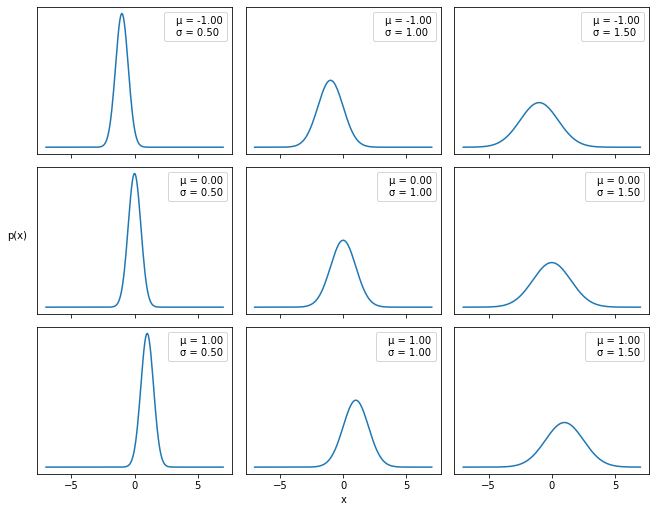

In [4]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), 
                     sharex=True, # убрать разметку на оси x
                     sharey=True, # убрать разметку на оси y
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x) # построим функцию плотности, привет Wolfram Mathematica
        ax[i,j].plot(x, y, label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd))
        ax[i,j].legend(loc=1, handlelength=0) # на заметку handlelength=0 не рисовать линию перед мю и сигмами
ax[2,1].set_xlabel('x');
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20);
ax[1,0].set_yticks([]);

Существуют два типа случайных переменных: непрерывные и дискретные (&copy; РешетниковВ.П.). <br>
Непрерывные переменные могут принимать любое значение из некоторого интервала. Для их представления можно воспользоваться числами с плавающей точкой - float языка Python. <br>
Дискретные переменные могут иметь только определенные значения. Эти переменные можно представить целыми числами (integer) языка Python. <br>
Очевидный для Вас факт - нормальное распределение является непрерывным распределением.<br>
Важный факт: на схемах рне указаны значения <code>yticks</code>, но это сделано преднамеренно. Данные значения не добавляют какой-либо важной информации и даже могут запутать. <br>
Подробнее: числа, указанные по оси $y$, в действительности не имеют особого смысла – важны лишь их относительные значения. Если взять два значения из $x$, например $x_i$ и $x_j$, и обнаружить, что $p(x_i) = 2p(x_j)$ (то есть на графике второе значение выше в два раза), то можно с уверенностью сказать, что вероятность значения $x_i$ в два раза больше вероятности значения $x_j$ (хотя это крайне спорное утверждение с точки зрения иеории - "... вероятность в точке равна нулю ..." &copy; РешетниковВ.П.). <br>
Большинство это понимает это интуитивно, и, к счастью, это правильная интерпретация.<br> 
Моя ремарка показывает, что ложность возникает, когда мы имеем дело с непрерывными распределениями, а значения по оси $y$ являются не вероятностями, а плотностями вероятности. Для получения правильного значения вероятности необходимо выполнить интегрирование по заданному интервалу, то есть требуется вычислить площадь под кривой распределения в заданном интервале. Вероятность не может быть больше единицы, но плотности вероятности могут превышать это значение, поэтому общая площадь под кривой плотности вероятности ограничена значением 1. Понимание различия между вероятностями и плотностями вероятностей чрезвычайно важно с математической точки зрения. <br>
При практическом подходе, принятом в нашем курсе, можно допустить небольшую неточность, поскольку различие между этими понятиями не столь важно, если вы правильно поняли, как интерпретировать схемы с учетом относительности значений.<br>

### Независимые одинаково распределенные случайные величины

Во многих моделях предполагается, что все последовательные значения случайных переменных выбраны из одного и того же распределения и независимы друг от друга. В этом случае их называют независимыми одинаково распре- деленными случайными величинами (переменными) (иногда для краткости используют аббревиатуру НОР или iid – independently and identically distributed). Используя математическую нотацию, можно показать, что две переменные являются независимыми, если $p(x,y) = p(x)p(y)$ для любых значений $x$ и $y$.

В качестве обобщенного примера случайных величин, которые не являются независимыми одинаково распределенными (non iid), можно привести временные ряды (temporal series), в которых временная зависимость, существующая в случайной переменной, представляет собой главную характеристику, которую необходимо принимать во внимание. Например, возьмем следующие данные с сайта https://cdiac.ess-dive.lbl.gov/trends/co2/sio-keel-flask/sio-keel-flaskmlo_c.html. Это данные измерений содержания $CO_2$ в атмосфере с 1959 по 1997 год. Загрузим эти данные (и прилагаемый к ним исходный код) и построим по ним график:

In [5]:
# увы все нет так просто
import pandas as pd
temp = pd.read_table('https://cdiac.ess-dive.lbl.gov/ftp/trends/co2/sio-keel-flask/maunaloa_c.dat',
                     header = 23, 
                     delim_whitespace=True,
                     names= ['Station code', 'Sample date', 'Weight', 'Flag',  'CO2'],
                     dtype={"Sample date": str}
                    )
display(temp.head(3))
display(temp.tail(3))

,Station code,Sample date,Weight,Flag,CO2
0,MLO,580329,4,0,316.1
1,MLO,580405,6,0,317.3
2,MLO,580412,4,0,317.6


,Station code,Sample date,Weight,Flag,CO2
2222,MLO,011215,7,0,371.2
2223,MLO,011222,6,0,371.3
2224,MLO,011229,6,0,371.5


In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station code  2225 non-null   object 
 1   Sample date   2225 non-null   object 
 2   Weight        2225 non-null   int64  
 3   Flag          2225 non-null   int64  
 4   CO2           2225 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 87.0+ KB


<b>Проблемы 2000 года:</b>   Функция Python может анализировать двухзначные годы, если задан код формата <code>%y</code>. Когда анализируются двухзначные годы, они конвертируются в соответствии со стандартами POSIX и ISO C: значения 69–99 отображаются на 1969–1999, а значения 0–68 отображаются на 2000–2068.

In [7]:
display (
    pd.to_datetime('580101', format = '%y%m%d'),
    pd.to_datetime('680101', format = '%y%m%d'),
    pd.to_datetime('690101', format = '%y%m%d'),
)

Timestamp('2058-01-01 00:00:00')

Timestamp('2068-01-01 00:00:00')

Timestamp('1969-01-01 00:00:00')

In [8]:
# заплатка, только ручками, еще хуже если есть перехлест по годам, тогда разводить по строкам. 
# другого решения  не знаю.
# кто найдет + к карме
temp['Date'] = np.where(temp['Sample date'].str[:2].astype(int)>20, '19'+temp['Sample date'],
         '20'+temp['Sample date']  )
temp['Date'] = pd.to_datetime(temp['Date'],format = '%Y%m%d')
display(temp.head(5))
display(temp.tail(5))

,Station code,Sample date,Weight,Flag,CO2,Date
0,MLO,580329,4,0,316.1,1958-03-29
1,MLO,580405,6,0,317.3,1958-04-05
2,MLO,580412,4,0,317.6,1958-04-12
3,MLO,580419,6,0,317.5,1958-04-19
4,MLO,580426,2,0,316.4,1958-04-26


,Station code,Sample date,Weight,Flag,CO2,Date
2220,MLO,011201,7,0,370.3,2001-12-01
2221,MLO,011208,7,0,370.8,2001-12-08
2222,MLO,011215,7,0,371.2,2001-12-15
2223,MLO,011222,6,0,371.3,2001-12-22
2224,MLO,011229,6,0,371.5,2001-12-29


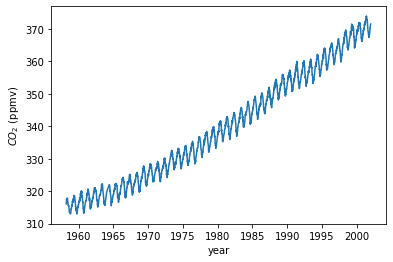

In [9]:
df = temp[['Date','CO2']]
plt.plot( df['Date'], df['CO2'])
plt.xlabel('year');
plt.ylabel('$CO_2$ (ppmv)');

Каждая точка данных соответствует измеренному уровню содержания $CO_2$ в атмосфере за месяц. Временную зависимость точек данных легко видеть на этом графике. <br>
В действительности здесь наблюдаются два тренда: сезонный (связанный с циклами роста и снижения) и глобальный, отображающий постоянный рост концентрации $CO_2$ в атмосфере.

### Теорема Байеса

$$ p(\theta|y) = \dfrac {p(y|\theta)p(\theta)}{p(y)} $$

Происхождение теоремы Байеса и логические ходы, приводящие к ее формулировке, помогут нам понять ее смысл.<br>

В соответствии с правилом произведения получаем:
$$  p(\theta, y ) = p(\theta|y) p(y) $$
или
$$  p(\theta, y ) = p(y,\theta) =  p(y|\theta) p(\theta) $$
Теперь можно объединить эти выражения и записать:
$$ p(\theta|y) p(y) = p(y,\theta) =  p(y|\theta) p(\theta) $$
что нам и дает формулу теоремы Байеса.

Почему же так важна данная теорема?

<b>Во-первых</b>, необходимо отметить, что $p(\theta|y)$ не обязательно является тем же самым, что $p(y|\theta)$. <br>
Это чрезвычайно важный факт, который легко упустить из вида в повседневных ситуациях даже людям, вполне сведущим в статистике и теории вероятностей. <br>
Рассмотрим простой пример для разъяснения того факта, что эти числовые характеристики не обязательно могут быть одинаковыми. Вероятность того, что человек является римским папой, при условии, что этот человек американец (мы живем в мире прекрамного сериала "Молодой папа" :)), не равна вероятности того, что человек является американцем, принимая во внимание, что этот человек является римским папой. Поскольку в настоящее время в Америке проживает около 327 млн человек и один из них является действующим римским папой, получаем $p(папа|американец) = \dfrac{1}{327 000 000}$, но при этом $p(американец|папа) = 1$.

<b>Во-вторых</b>, если заменить элемент $\theta$ на «предположение» (гипотезу), а элемент $y$ на «данные», то теорема Байеса показывает, как вычислить вероятность предположения $\theta$ при наличии данных $y$. <br>
Именно такое объяснение смысла практического применения теоремы Байеса вы найдете во многих местах. <br>
Но как превратить предположение в некий объект, который можно поместить в формулу теоремы Байеса? Это делается с использованием распределений вероятностей. Вообще говоря, наше предположение (или гипотеза) представляет собой предположение в чрезвычайно узком смысле, если говорить более точно, то мы ищем наиболее подходящее значение для параметров выбранных нами моделей, то есть для параметров распределений вероятностей. <br>
Кстати, не следует пытаться в качестве предположения $\theta$ подставить выражения типа «единороги существуют», если только вы не намерены создать реалистичную вероятностную модель существования единорогов.

Теорема Байеса занимает центральное место в байесовской статистике и применение таких инструментов, как PyMC3 или PyMC4, освобождает от необходимости всякий раз явно записывать теорему Байеса при создании байесовской модели.

Однако важно знать название каждого элемента теоремы, поскольку мы постоянно будем ссылаться на эти элементы, и весьма важно понимать, что означает каждый элемент, так как это помогает теоретическому обоснованию (концеп- туализации) моделей. <br>
Ниже приведены обозначения и соответствующие на- звания элементов теоремы Байеса:
<ul>
<li>$p(\theta)$ – априорная вероятность;</li>
<li>$p(y|\theta)$ – правдоподобие;</li>
<li>$p(\theta|y)$ – апостериорная вероятность;</li>
<li>$p(y)$ – предельное правдоподобие.</li>
</ul>
Теперь можно сказать, что мы вычисляем апостерионую веревоятность на основе правдоподобия априорной вероятности (иначе говоря, по известному факту события $p(y)$ вычислить вероятность того, что оно было вызвано данной причиной $p(\theta|y)$).<br>
<b>Априорная вероятность</b> должна соответствовать тому, что нам известно о значении параметра $\theta$ перед рассмотрением данных $y$.<br>
Если нам ничего неизвестно, как Джону Сноу о своих родителях, то можно использовать постоянные фиксированные априорные вероятности, которые не содержат сколько-нибудь значимого объема информации. Вообще говоря, можно выбрать более удачный вариант, чем фиксированные априорные вероятности, как мы увидим далее. <br>
Использование априорных вероятностей – это основная причина, по которой некоторые  продолжают называть байесовскую статистику субъективной, даже если априорные вероятности представляют собой всего лишь другой спо- соб предположений, формулируемых при моделировании, следовательно, являются субъективными (или объективными) в той же мере, что и любые другие предположения, такие как правдоподобия.

<b>Правдоподобие</b> определяет, как будут представлены данные в дальнейшем анализе. Это выражение правдоподобности данных с учетом принятых параметров. В некоторых публикациях используются термины «сэмплинг-модель», «статистическая модель» или просто «модель». Мы продолжим использовать термин «правдоподобие» и будем обозначать им комбинацию априорных вероятностей в привязке к модели правдоподобия.

<b>Апостериорная вероятность</b> – это результат байесовского анализа, который отображает все, что известно о задаче (проблеме) с учетом имеющихся данных и используемой модели. Апостериорная вероятность – это распределение вероятностей для $\theta$ параметров в используемой модели, и это не единственное значение. 
Такое распределение представляет собой баланс между априорной вероятностью и правдоподобием. <br>
Существует широко известная шутка: «Байесовский аналитик – это тот, кто смутно надеется увидеть лошадь, но, заметив быстро промелькнувшего осла, твердо верит, что видел мула». <br>
Однака в этой шутке есль логтческая ошибка - если правдоподобие и априорные вероятности неясны и смутны, то вы получите апостериорную вероятность, отражающую «смутную веру» в то, что видели мула, а не твердую уверенность. 
В любом случае данная шутка выражает мысль о том, что апостериорная вероятность является в некоторой степени компромиссом между априорной вероятностью и правдоподобием. 

С теоретической концептуальной точки зрения можно воспринимать апостериорную вероятность как обновленную априорную вероятность в свете (новых) данных. <br>
В действительности апостериорная вероятность, полученная в результате одного процесса анализа, может использоваться как априорная вероятность для нового процесса анализа. Это свойство делает байесовский анализ особенно подходящим для анализа данных, которые становятся доступными в определенном последовательном порядке. Примерами могут служить системы раннего оповещения о природных катастрофах, которые обрабатывают в режиме онлайн данные, поступающие с метеорологических станций и спутников.

<b>Предельное правдоподобие</b>, также называемое обоснованностью. Формально предельное правдоподобие – это вероятность исследуемых данных, усредненная по всем возможным значениям, которые могут принимать параметры (в соответствии с предварительно описанной априорной вероятностью). В любом случае, мы практически  не уделяем особого внимания предельному правдоподобию и будем считать его простым фактором усреднения. Такой подход принят потому, что при анализе распределения апостериорной вероятности нас будут интересовать только относительные, а не абсолютные значения параметров, как на наших схемах плотности распределения вероятности. 

Если не принимать во внимание предельное правдоподобие, то можно записать теорему Байеса как пропорциональное отношение:

$$ p(\theta|y) \propto p(y|\theta)p(\theta)$$

## Задача о монете

Задача о подбрасывании монеты – это классическая задача статистики, которая выполняется следующим образом: монета подбрасывается некоторое количество раз, и фиксируется, сколько выпало орлов и решек. <br>
На основе полученных в результате данных мы пытаемся ответить на такие вопросы, как: является ли монета настоящей («правильной»)? Или в более общем смысле: насколько несимметричной («неправильной») является монета? <br>
Многие реальные практические задачи определяются бинарными, взаимоисключающими итоговыми результатами, такими как 0 или 1, положительный или отрицательный ответ, четные или нечетные числа, удача или неудача, кот или собака, безопасно или небезопасно, здоровый или больной. Таким образом, даже если мы говорим о монетах, эта модель применима к любой из выше перечисленных задач.<br>
Для того чтобы определить отклонение монеты от нормы и в общем смысле ответить на любые вопросы при байесовском подходе, потребуются данные и вероятностная модель. 
В рассматриваемом  примере предполагается, что монета уже подброшена некоторое количество раз и у нас есть записи о количестве выпавших орлов и решек, так что этап сбора данных уже выполнен. <br>
Для выбора модели потребуется немного больше усилий. Поскольку это самая первая наша модель, запишем теорему Байеса в ее основной форме и выполним необходимые математические операции. Такой способ будет работать очень медленно. <br>
В дальнейшем мы воспользуемся библиотекой PyMC4, и компьютер произведет все необходимые математические вычисления.

### Общая модель

В первую очередь необходимо обобщить концепцию отклонения (от нормы). Будем считать, что монета с отклонением 1 всегда падает орлом вверх, а монета с отклонением 0 всегда падает вверх решкой. При отклонении 0.5 в половине случаев выпадает орел, в половине случаев – решка. Для представления отклонения будет использоваться параметр $\theta$, а при общем количестве подбрасываний монеты $N$ число выпавших орлов обозначается переменной $y$. В соответствии с теоремой Байеса необходимо определить априорную вероятность $p(\theta)$ и правдоподобие $p(y|\theta)$, которые будут использоваться в примере. 

<b>Начнем с определения правдоподобия.</b>

Предположим, что возможны только два итоговых результата – выпадение орла или решки. Также предположим, что любое подбрасывание монеты никак не влияет на другие броски, то есть предполагается, что все подбрасывания монеты абсолютно независимы друг от друга. Далее предположим, что все подбрасывания монеты подчиняются одному и тому же распределению.<br>
Таким образом, случайная переменная «подбрасывание монеты» представляет собой пример независимой одинаково распределенной случайной переменной, или iid-переменной. <br>
С учетом сделанных предположений подходящим кандидатом для выражения правдоподобия является биномиальное распределение:<br>

$$ p(y|\theta,N) = \dfrac{N!}{y!(N-y!)}\theta^y (1-\theta)^{N-y}$$

Это дискретное распределение, возвращающее вероятность выпадения $y$ орлов (или в обобщенном смысле успешных результатов) при $N$ подбрасываниях монеты (или в обобщенном смысле испытаний либо экспериментов) с учетом постоянного значения $\theta$:

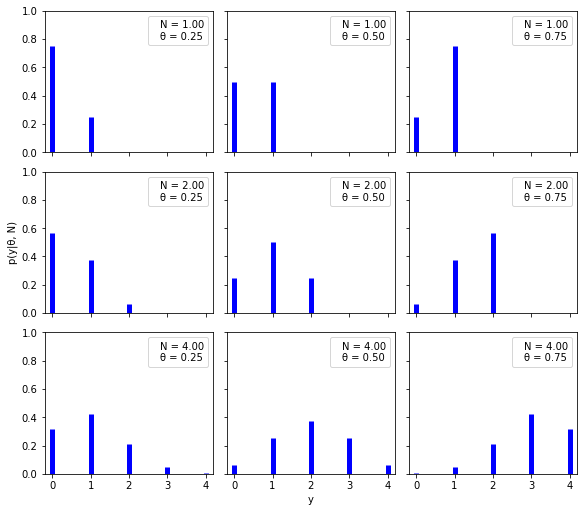

In [10]:
n_params = [1, 2, 4] # Количество испытаний (один бросок, два броска и четыре броска монеты)
p_params = [0.25, 0.5, 0.75] # Вероятность успешного результата (вероятность выпадания орела, ни как не связана с бросками)
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), 
                    sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True) 
for i in range(len(n_params)):
    for j in range(len(p_params)): 
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x) 
        ax[i,j].vlines(x, 0, y, colors='blue', lw=5, 
                       label="N = {:3.2f}\nθ = {:3.2f}".format(n,p)); 
        ax[i,j].set_ylim(0, 1);
        ax[i,j].legend(loc=1, handlelength=0) ;
ax[2,1].set_xlabel('y') ;
ax[1,0].set_ylabel('p(y|θ, N)'); 
ax[0,0].set_xticks(x);

В результате получили девять биномиальных распределений. На легенда указано значения параметров. Отметим, что на этих графиках указаны значения по оси $y$. Очевидно, что если сложить высоты столбцов на каждом графике в сумме мы получим 1.<br>
То есть для дискретных распределений высоты столбцов на схеме представляют вероятности.<br>
Биномиальное распределение является обоснованным выбором для представления правдоподобия. Можно видеть, что $\theta$ обозначает, насколько вероятным является выпадение орла при подбрасывании монеты (см. на ось x):<br>
x=0 - N орлов, 0 решек<br>
x=1 - N-1 орлов,  1 решека<br>
x=N+1 - 0 орлов, N решек<br>

Итак, если нам известно значение $\theta$, то биномиальное распределение покажет ожидаемое распределение выпадений орлов. Единственная проблема состоит в том, что нам неизвестно значение $\theta$. 
Байесовская статистика хороша тем, что при неизвестном значении параметра для него принимается априорная вероятность.

<b>Априорная вероятность</b>
В качестве априорной вероятности будет использоваться бета-распределение – наиболее часто применяемое распределение в байесовской статистике, которое описывается следующей формулой:

$$p(\theta)=\dfrac{1}{ B (\alpha , \beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} $$

Бета-распределение в теории вероятностей и статистике — двухпараметрическое семейство абсолютно непрерывных распределений. Используется для описания случайных величин, значения которых ограничены конечным интервалом.


С помощью приведенного ниже кода исследуем данное распределение:

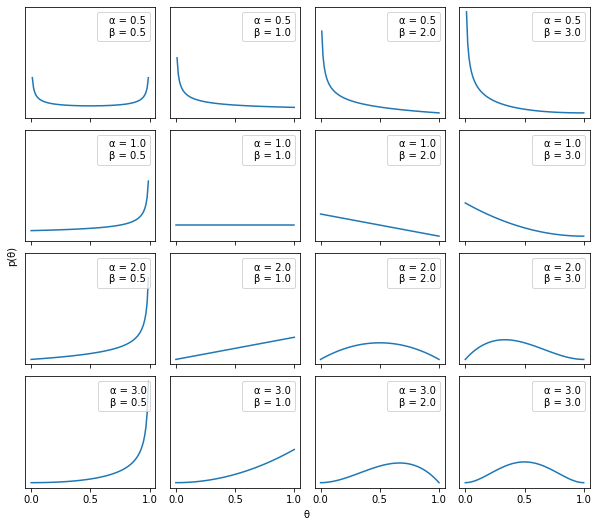

In [11]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), 
                     sharex=True,
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True
                    )
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b)) 
        ax[i,j].legend(loc=1, handlelength=0)
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.02, 'θ', ha='center');
f.text(-0.02, 0.5, 'p(θ)',va='center', rotation=90);

Существует множество обоснований использования бета-распределения для подобной задачи.

Одно из обоснований состоит в том, что бета-распределение ограничено интервалом от 0 до 1, точно так же, как параметр $\theta$. В общем случае бета-распределение используется, когда необходимо создать модель, пропорциональную биномиальной переменной.<br>

Другим обоснованием может служить универсальность бета-распределения. На схемах можно видеть, что бета-распределение принимает несколько разнообразных форм (всегда ограниченных интервалом [0, 1]), в том числе равномерное распределение, гаусс-подобные распределения и U-образные распределения. 

Третье обоснование: бета-распределение – это сопряженная априорная вероятность биномиального распределения (которое мы используем как представление правдоподобия). Сопряженное априорное распределение правдоподобия – это априорная вероятность, которая при использовании в сочетании с заданным правдоподобием возвращает апостериорную вероятность в той же самой функциональной форме, в которой была представлена априорная вероятность. <br>
Проще говоря, каждый раз при использовании бета-распределения как априорной вероятности и биномиального распределения как правдоподобия мы получаем бета как апостериорное распределение. 

Существуют и другие пары сопряженных априорных распределений, например нормальное распределение является сопряженным априорным распределением с самим собой. В течение долгого времени байесовский анализ был ограничен применением сопряженных априорных распределений. Сопряженность обеспечивала удобство математического манипулирования апостериорной вероятностью, а это весьма важно с учетом того, что общей проблемой байесовской статистики является получение конечного результата в виде апостериорной вероятности, которая не может быть разрешена аналитически. Это было камнем преткновения, пока не были разработаны эффективные вычислительные методы для решения вероятностных задаx, о которых мы поговорим чуть дальше.

<b>Получение апостериорной вероятности</b>

Вспомним, что теорема Байеса определяет апостериорную вероятность как пропорциональную произведению правдоподобия на априорную вероятность. Следовательно, в нашей задаче необходимо перемножить биномиальное распределение и бетараспределение:

$$p(\theta|y,N) \propto \dfrac{N!}{y!(N-y!)}\theta^y (1-\theta)^{N-y} \dfrac{1}{ B (\alpha , \beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

Внимание! тут пропущено предельное правдоподобие, которое вычисляется через интеграл, и именно оно несет основную вычислительную проблему в задачах. Ниже есть ссылка полную формулу.

Упростим выражение, исходя из соображений, что все независяшие от $\theta$ множители можно отбросить, при этом результат останется корректным (мы здесь говорим о пропорциональности, а отброшенные множители не зависят от переменной).

$$p(\theta|y,N) \propto\theta^y (1-\theta)^{N-y}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

Затем

$$p(\theta|y,N) \propto\theta^{y+\alpha-1}(1-\theta)^{N-y+\beta-1}$$

Теперь (внимательно следим за руками) можно заметить, что формула имеет ту же функциональную форму, что и формула бета-распределения, если переобозначить 
$ \alpha_{posterrior}=\alpha_{prior}+y$ и $\beta_{posterrior}=\beta_{prior}+N-y$
(Тут есть строгое доказательство:
https://ru.wikipedia.org/wiki/Сопряжённое_априорное_распределение)

Поэтому:
$$p(\theta|y,N) = \dfrac{1}{B(\alpha_{prior}+y, \beta_{prior}+N-y)} \theta^{\alpha_{prior}+y-1}
(1-\theta)^{\beta_{prior}+N-y-1}
$$
Нужно понимать, что такой аналитический подход, красив, но часто бесполезен в практических задачах. Сейчас все решают численные методы в данном классе модельных задач. 

Пока мы воспользуемся аналитическим выводом для демострации решения задачи с монетой.

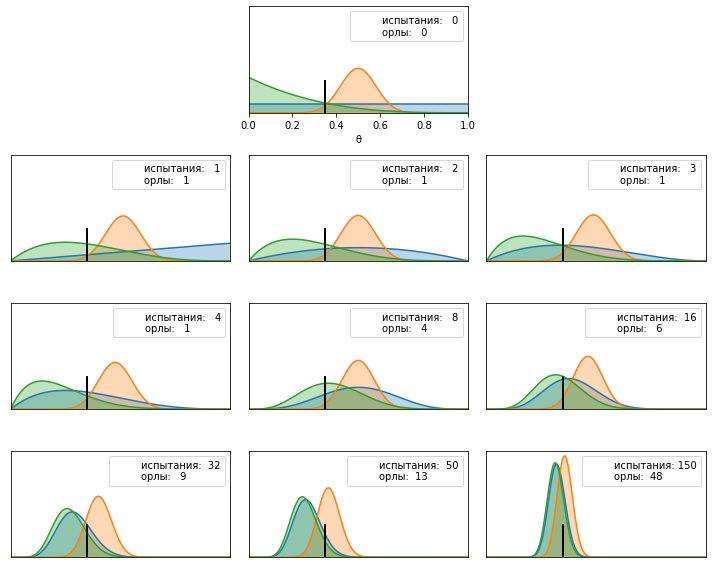

In [62]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]  # число испытаний
data =     [0, 1, 1, 1, 1, 4,  6,  9, 13,  48]  # число орлов в испытании
theta_real = 0.35 # идеальный результат (монета фальшивая :)) 
beta_params = [(1, 1), (20, 20), (1, 4)] 
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials): 
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ') 
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([]) 
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y) 
        plt.plot(x, p_theta_given_y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.3)
        plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0.5, 0, label=f'испытания:{N:4d}\nорлы:{y:4d}', alpha=0)
    plt.legend(loc=3, handlelength=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

На самом первом (верхнем) графике показано состояние при нуле испытаний, следовательно, три кривые представляют три разных априорных распределения вероятностей:
<ul>
<li>
универсальное (синий цвет) априорное распределение, которое представляет все возможные значения для отклонения, то есть равновероятное  распределение (то есть до испытания, мы ничего не знаем и не предпологаем);</li>
<li>
гаусс-подобное (оранжевый цвет) априорное распределение сконцентрировано в центральной области около значения 0.5, таким образом, это априорное распределение совместимо с информацией, сообщающей, что монета имеет более или менее равные шансы упасть вверх орлом или решкой при подбрасывании. Также можно сказать, что это апри- орное распределение совместимо со степенью уверенности в том, что монета является «правильной». Несмотря на то что понятие степени уверенности широко используется при обсуждении байесовского анализа, здесь мы предпочитаем говорить о моделях и параметрах, для которых информацию предоставляют данные; </li>
<li>
асимметричное (зеленый цвет) априорное распределение придает наибольший вес результатам с отклонением в сторону выпадения решки
</li>
</ul>
Все остальные графики отображают апостериорные распределения для последовательно проводимых испытаний. Количество испытаний (подбрасываний монеты) и количество выпавших орлов показано в легенде каждого графика. Кроме того, на всех графиках изображена черная вертикальная линия на абсциссе 0.35, представляющая истинное значение для $\theta$. Разумеется, в реальных задачах это значение неизвестно, но здесь оно приведено только в учебных целях. <br>
Эти схемы могут помочь узнать очень много о байесовском анализе, так что приготовьте мозг к перезагрузке! Начинаются воистину бесовские методы анализа!<br>
Поехали!
<ul>
<li>
    результатом байесовского анализа является апостериорное распределение, а не единственное значение, то есть  распределение правдоподобных значений предоставляет собой как данные так и выбранную нами модель;
</li>
<li> наиболее вероятное значение выбирается по моде апостериорного распределения (то есть по пиковому значению этого распределения)
</li>
<li> размах (разброс) апостериорного распределения пропорционален неопределенности, присущей значению параметра: чем больше размах распределения, тем меньше степень уверенности;
</li>
<li>интуитивно мы более уверены в результате, если наблюдаем больше данных, подтверждающих этот результат. Таким образом, даже если в числовом выражении 1/2 = 4/8 = 0.5, наблюдение четырех выпавших орлов в восьми испытаниях дает большую степень уверенности в том, что отклонение равно 0.5, нежели наблюдение одного выпавшего орла в двух испытаниях. 
    Эта интуитивная уверенность отображается в апостериорном распределении, так как можно проверить себя, если обратить внимание на схему апостериорного распределения (синий цвет) на третьем и шестом графиках. Несмотря на то что мода одинакова, размах (неопределенность) больше на третьем графике, чем на шестом;
</li>
    <li>
        при наличии достаточно большого объема данных две и более байесовские модели с различными априорными распределениями будут демонстрировать сходимость к одному и тому же результату. В экстремальном случае при бесконечных данных не имеет значения, какое априорное распределение используется – при любом распределении результатом является одно и то же апостериорное распределение. 
        Напомним, что бесконечность – это предельный случай, который не имеет числового выражения, поэтому с практической точки зрения существует возможность получения по существу не различающихся между собой апостери- орных распределений при конечном и относительно небольшом количестве точек данных;
</li>
    <li>скорость сходимости апостериорных распределений к одной форме распределения зависит от данных и от модели. На схеме можно видеть, что апостериорные распределения, происходящие от универсального априорного распределения (синий цвет) и от априорного распределения с отклонением в сторону выпадения решек (зеленый цвет), быстрее сходятся к почти одинаковой форме распределения при большей длительности испытаний по сравнению с апостериорным распределением, показанным оранжевым цветом (происходящим от концентрированного априорного распределения). В действительности даже после 150 испытаний можно достаточно легко отличить апостериорное распределение, обозначенное оранжевым цветом, от двух других распределений;
</li>
    <li>по схеме не очевидно, что можно получить тот же результат, если последовательно обновлять апостериорное распределение после каждого испытания вместо однократного итогового определения. Но это именно так. 
        Можно вычислять апостериорное распределение 150 раз, добавляя по одному наблюдению испытания и используя полученный результат как новое априорное распределение, или можно один раз вычислить апостериорное распределение после 150 бросков монеты. 
        Результат будет абсолютно одинаковым. Это свойство не только имеет особый (положительный) смысл, но также естественным образом приводит к обновлению наших прогнозов при получении новых данных. Подобная ситуация является вполне обычной при решении многих задач анализа данных.
</li>
</ul>

### Важные филосовские рассуждения  (если пропущу на лекции почитайте)

Из примера, приведенного в предыдущем разделе, понятно, что априорные вероятности могут влиять на логические выводы. В целом это положительное влияние. Предполагается, что априорные вероятности обладают этим свойством. 

Начинающие изучать байесовский анализ (а также критики бесовских методов анализа) часто испытывают "легкое" беспокойство по поводу выбора априорных вероятностей, поскольку им кажется нежелательным, чтобы априорная веро- ятность действовала как цензор, не позволяющий данным говорить самим за себя. <br>
Это правильно, но следует помнить, что в действительности данные далеко не всегда "говорят", в лучшем случае они "шепчут".<br>
Данные имеют смысл только в контексте выбранных нами моделей, включая математические и мысленные модели. В истории науки можно найти множество примеров, когда одни и те же данные приводили людей к различному восприятию и образу мышления в одной области. Такое может происходить, даже если взгляды и выводы исследователя основаны на формальных моделях.<br>

Некоторым специалистам нравится идея использования неинформативных априорных вероятностей (также называемых плоскими, неопределенными (нечеткими) или диффузными априорными вероятностями). Этот тип априорных вероятностей оказывает наименьшее возможное воздействие на анализ. Можно воспользоваться этой идеей, но, вообще говоря, есть возможность выбрать более эффективное решение.

Однако мы отдадим предпочтение предпочтение слабо информативным (или не вполне информативным) априорным вероятностям. При решении многих задач часто известно кое-что о значениях, которые могут принимать параметры, то есть можно знать, что диапазон параметра ограничен только положительными значениями, или известен приблизительный возможный интервал его значений, или можно предположить, что значение параметра близко к нулю или меньше/больше некоторого конкретного значения. 
В таких случаях можно использовать априорные вероятности для передачи некоторой нечеткой («слабой») информации в применяемые модели, не боясь оказаться излишне влияние на нее. Поскольку такие априорные вероятности действуют как факторы, позволяющие сохранять апостериорное распределение в определенных разумных границах, их также называют регуляризирующими априорными вероятностями. 

Использование информативных априорных вероятностей также является возможным вариантом, если мы располагаем высококачественной информацией для определения априорной вероятности. Информативные априорные вероятности – это весьма строгие априорные вероятности, содержащие и передающие большой объем информации. В зависимости от конкретной задачи нахождение этого типа априорной вероятности может оказаться простым или сложным делом. 
<br>
Отсюда главный вывод: если имеется надежная предварительная информация, то нет никаких причин отказываться от ее использования. Не следует принимать во внимание довольно бессмысленное возражение по поводу того, что быть объективным – значит отбрасывать всю полезную значимую информацию. Представьте, что было бы, если бы инженер по проектированию автомобилей, каждый раз приступая к созданию новой машины, начинал бы с нуля и вновь изобретал двигатель внутреннего сгорания, колесо и вообще всю концепцию современного автомобиля. Это абсолютно неподходящий метод для эффективной работы.


## Инструменты

<b>Визуализация</b> (http://www.sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/).<br>
По данному адресу Вы найдете крутой инструмент визуализации нотаций Байесовских моделей. Есть также пакет для LaTex

<b>Анализ апостериорного распределения</b><br>
ArviZ – это пакет языка Python для выполнения анализа данных с использованием байесовских моделей. ArviZ содержит множество функций, помогающих обобщить и визуализировать апостериорное распределение.

<b>Проверка апостериорного прогнозируемого распределения</b><br>
Одним из полезных элементов байесовского комплекта инструментальных средств является наличие апостериорного распределения вероятностей, что позволяет использовать апостериорное распределение для генерации прогнозов  на основе данных $y$ и предполагаемых оценочных параметров $\theta$.

Апостериорное прогнозируемое распределение является усреднением условных прогнозов по апостериорному распределению параметра $\theta$. 

Генерируемые прогнозы  могут использоваться для прогнозирования, а также для валидации моделей при сравнении наблюдаемых данных и прогнозируемых данных для выявления различий между этими двумя наборами.
Этот процесс называют проверками апостериорного прогнозируемого распределения (posterior predictive checks). Главная цель – проверка собственной согласованности и целостности. Сгенерированные и наблюдаемые данные должны выглядеть более или менее одинаково, в противном случае явно существует проблема, возникшая при моделировании или при передаче данных в модель. Попытка понять природу этого несоответствия может привести к усовершенствованию моделей или, по крайней мере, к пониманию ее ограничений. 

